# Bikes Problem

### Problem Defintion
1. info 1
2. info 2
3. resources links


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

### Read dataset

1. **datatime:** the date and the time for an hour of a day.
2. **season:** the season of bla bla

In [110]:
df = pd.read_csv('bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


### Data Analayis

**Question**

1. Make Profit Feature.
    - Each registerd user rent bike for 5 USD/hour.
    - Casual user rent bike for 20 USD/hour.
    - Taxes 0.14%.
    - Maintance 1500/year.
2. Distribution rental_bikes_count & profit.
3. Profit for each day.
4. Which season that has more registeration & profit.
5. Which weather condition that has more registeration & profit.
6. Correlation between profit & bikes count with all features.
7. Rentals during rush hours (7-9 am & 3-5 pm).
7. Rentals during workday & holiday.
8. Registered or casual is more.
9. What is the average of bikes would be registered during the week.
10. Schools (9-12) & (2-6) profit.
11. Profit in 2011 & saturdays & season fall

In [4]:
# 1. Make Profit Feature.
def calculate_profit(x):
    casual_customers = x['casual']
    registerd_customers = x['registered']
    registerd_price_per_hour = 5
    casual_price_per_hour = 20
    taxes_percent = 0.14
    maintenance_per_hour = 1500 / (365*24)
    profit_cash = casual_customers * casual_price_per_hour + registerd_customers * registerd_price_per_hour
    profit_with_taxes = profit_cash - (taxes_percent * profit_cash)
    total_profit = profit_with_taxes - maintenance_per_hour
    return total_profit



df['Profit'] = df[['casual', 'registered']].apply(calculate_profit, axis=1)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [5]:
# 2. Distribution rental_bikes_count & profit.
df['rented_bikes_count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: rented_bikes_count, dtype: float64

In [6]:
df['Profit'].describe()

count    10886.000000
mean      1288.280751
std       1309.683400
min          4.128767
25%        253.528767
50%        889.928767
75%       1891.828767
max       7881.728767
Name: Profit, dtype: float64

In [7]:
df[df['rented_bikes_count'] == df['rented_bikes_count'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
9345,2012-09-12 18:00:00,Fall,0.0,NaN,Clear,27.06,NaN,16.9979,91,886,977,5374.828767


In [8]:
df[df['Profit'] == df['Profit'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
9415,2012-09-15 16:00:00,Fall,0.0,0.0,Mist,NaN,36.0,15.0013,350,433,783,7881.728767


In [9]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [10]:
# 3. Profit for each day per week.
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767


In [11]:
df['year'] = df['datetime'].dt.year
df['month_name'] = df['datetime'].dt.month_name()
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,January,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22


In [12]:
df.groupby('day_of_week').describe()['rented_bikes_count'].transpose()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,197.844343,190.390716,196.665404,180.839772,197.296201,189.723847,188.411348
std,172.518208,180.943376,180.917795,167.022145,187.606619,186.719673,190.942004
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,52.000000,39.000000,45.000000,43.000000,44.000000,36.000000,38.000000
50%,167.000000,146.000000,141.500000,119.000000,155.000000,146.000000,136.000000
75%,290.000000,277.500000,309.500000,298.000000,280.000000,274.000000,270.500000
max,900.000000,968.000000,783.000000,757.000000,901.000000,970.000000,977.000000


In [13]:
df.groupby('day_of_week').describe()['Profit'].transpose()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,1250.484751,1203.496079,1666.252504,1513.401535,1157.893803,1112.073082,1100.526188
std,1110.019552,1129.727600,1772.625088,1571.404307,1086.029849,1065.481400,1111.243780
min,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767
25%,300.828767,249.228767,283.628767,287.928767,236.328767,210.528767,210.528767
50%,1036.128767,954.428767,956.578767,812.528767,911.428767,834.028767,791.028767
75%,1891.828767,1827.328767,2614.228767,2429.328767,1741.328767,1704.778767,1657.478767
max,5908.028767,5594.128767,7881.728767,7034.628767,5533.928767,6338.028767,5447.928767


In [14]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,January,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22


In [15]:
# 4. Which season that has more registeration & profit.
df.groupby('season').describe()['Profit'].transpose()

season,Fall,Spring,Summer,Winter
count,2680.000000,2634.000000,2670.000000,2688.000000
mean,1682.572797,697.150331,1533.249029,1222.474898
std,1429.092535,850.960767,1454.120645,1184.508417
min,4.128767,4.128767,4.128767,4.128767
25%,445.953767,128.828767,318.028767,292.228767
50%,1412.378767,436.278767,1212.428767,935.078767
75%,2472.328767,914.653767,2244.428767,1751.003767
max,7881.728767,7679.628767,7795.728767,7864.528767


In [16]:
df.groupby('season').describe()['rented_bikes_count'].transpose()

season,Fall,Spring,Summer,Winter
count,2680.000000,2634.000000,2670.000000,2688.000000
mean,234.471642,116.089218,214.711610,198.672247
std,197.122029,125.353298,192.109412,177.491672
min,1.000000,1.000000,1.000000,1.000000
25%,68.000000,23.000000,47.000000,51.000000
50%,195.000000,78.000000,171.500000,161.000000
75%,348.000000,163.000000,321.750000,294.000000
max,977.000000,801.000000,873.000000,948.000000


In [17]:
# 5. Which weather condition that has more registeration & profit.
df.groupby('weather').describe()['Profit'].transpose()

weather,Clear,Mist,Rainy,Snowy
count,5793.000000,2259.000000,693.000000,1.000000
mean,1391.800302,1171.014380,735.358349,782.428767
std,1372.771954,1164.297225,925.280928,NaN
min,4.128767,4.128767,4.128767,782.428767
25%,283.628767,244.928767,128.828767,782.428767
50%,1006.028767,834.028767,399.728767,782.428767
75%,2055.228767,1758.528767,932.928767,782.428767
max,7795.728767,7881.728767,5542.528767,782.428767


In [18]:
df.groupby('weather').describe()['rented_bikes_count'].transpose()

weather,Clear,Mist,Rainy,Snowy
count,5793.000000,2259.000000,693.000000,1.0
mean,204.109442,179.722001,118.741703,164.0
std,187.713187,168.655730,138.911722,NaN
min,1.000000,1.000000,1.000000,164.0
25%,47.000000,40.000000,24.000000,164.0
50%,160.000000,137.000000,73.000000,164.0
75%,302.000000,266.000000,158.000000,164.0
max,977.000000,890.000000,891.000000,164.0


In [19]:
# 6. Correlation between profit & bikes count with all features.
df.corr()[['Profit', 'rented_bikes_count']]

,Profit,rented_bikes_count
holiday,0.017410,-0.005827
workingday,-0.150218,0.010940
temp,0.462618,0.391867
humidity,-0.358150,-0.317282
windspeed,0.100205,0.097747
casual,0.902713,0.690414
registered,0.822156,0.970948
rented_bikes_count,0.934490,1.000000
Profit,1.000000,0.934490
year,0.226345,0.260403


<AxesSubplot:>

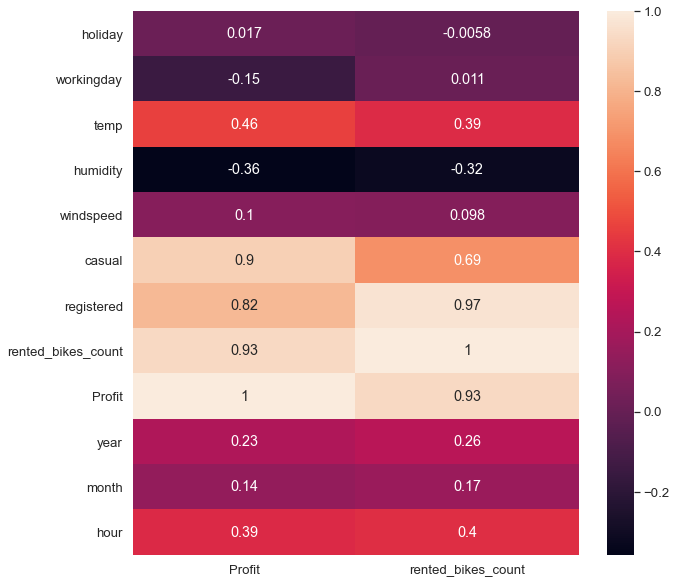

In [20]:
sns.heatmap(df.corr()[['Profit', 'rented_bikes_count']], annot=True)

In [21]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,January,1,Saturday,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,January,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22


In [22]:
# 7. Rentals & profit during rush hours (7-9 am & 15-17 pm).

def is_rush_hour(hour):
    return 1 if hour in [7,8,9,15,16,17] else 0
        
df['is_rush_hour'] = df['hour'].apply(is_rush_hour)
df

# you can also do this using lambda
# df['is_rush_hour'] = df['hour'].apply(lambda hour: 1 if hour in [7,8,9,15,16,17] else 0)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,January,1,Saturday,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,January,1,Saturday,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19,0
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20,0
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21,0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22,0


In [23]:
df.groupby('is_rush_hour').describe()['rented_bikes_count'].transpose()

is_rush_hour,0,1
count,8153.000000,2733.000000
mean,153.140562,306.227955
std,158.808647,194.740685
min,1.000000,1.000000
25%,26.000000,157.000000
50%,108.000000,276.000000
75%,225.000000,420.000000
max,977.000000,970.000000


In [24]:
df.groupby('is_rush_hour').describe()['Profit'].transpose()

is_rush_hour,0,1
count,8153.000000,2733.000000
mean,1069.674358,1940.420498
std,1217.987206,1356.260623
min,4.128767,4.128767
25%,158.928767,937.228767
50%,644.828767,1689.728767
75%,1547.828767,2622.828767
max,7864.528767,7881.728767


In [25]:
# 7. Rentals during workday & holiday.
df.groupby('workingday').describe()['rented_bikes_count'].transpose()

workingday,0.0,1.0
count,3021.000000,6367.000000
mean,188.369083,192.613162
std,173.488936,184.815639
min,1.000000,1.000000
25%,43.000000,41.000000
50%,129.000000,150.000000
75%,304.000000,276.000000
max,783.000000,970.000000


In [26]:
df.groupby('workingday').describe()['Profit'].transpose()

workingday,0.0,1.0
count,3021.000000,6367.000000
mean,1573.934792,1152.249028
std,1654.267541,1086.615292
min,4.128767,4.128767
25%,279.328767,236.328767
50%,898.528767,889.928767
75%,2493.828767,1758.528767
max,7881.728767,6338.028767


In [27]:
# 8. Registered or casual is more.
df.corr()[['Profit', 'rented_bikes_count']].loc[['casual', 'registered']]

,Profit,rented_bikes_count
casual,0.902713,0.690414
registered,0.822156,0.970948


In [28]:
# 9. What is the average of bikes would be rented during the week.
df.groupby('day_of_week').mean()[['rented_bikes_count', 'Profit']]

,rented_bikes_count,Profit
day_of_week,,
Friday,197.844343,1250.484751
Monday,190.390716,1203.496079
Saturday,196.665404,1666.252504
Sunday,180.839772,1513.401535
Thursday,197.296201,1157.893803
Tuesday,189.723847,1112.073082
Wednesday,188.411348,1100.526188


In [29]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,January,1,Saturday,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,January,1,Saturday,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19,0
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20,0
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21,0
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22,0


In [30]:
df['month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [31]:
# 10. Schools (9-12) & (2-6) profit.

def check_is_school_day(month):
    return 1 if month in ['September', 'October', 'November', 'December', 'February', 'March', 'April', 'May', 'June'] else 0

df['is_school_day'] = df['month_name'].apply(check_is_school_day)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour,is_school_day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,January,1,Saturday,0,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1,0,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2,0,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3,0,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,January,1,Saturday,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19,0,1
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20,0,1
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21,0,1
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22,0,1


In [32]:
df.groupby('is_school_day').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
is_school_day,,,,,,,,
0,2708.0,1302.252401,1290.751798,4.128767,240.628767,881.328767,2038.028767,6497.128767
1,8178.0,1283.654287,1315.937715,4.128767,257.828767,894.228767,1848.828767,7881.728767


In [33]:
df.groupby('is_school_day').describe()['rented_bikes_count']

,count,mean,std,min,25%,50%,75%,max
is_school_day,,,,,,,,
0,2708.0,187.598597,179.258377,1.0,40.0,139.0,282.0,897.0
1,8178.0,192.890560,181.756401,1.0,44.0,147.0,284.0,977.0


In [34]:
# 11. Profit in 2011 & saturdays & season fall
df[ (df['year'] == 2011) & (df['day_of_week'] == 'Saturday')  & (df['season'] == 'Fall')][['Profit', 'rented_bikes_count']].sum()

Profit                351695.079452
rented_bikes_count     38354.000000
dtype: float64

### Data Visualization

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month_name          10886 non-null  object    

**Numerical Features**
- temp
- humidity
- windspeed
- casual
- registerd
- rented_bikes_count  
- Profit              

**Numerical Features - Univariate**

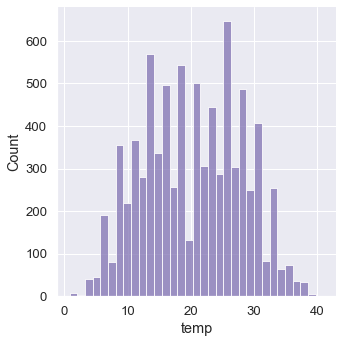

In [36]:
sns.displot(df['temp'], kde=False, color='m')

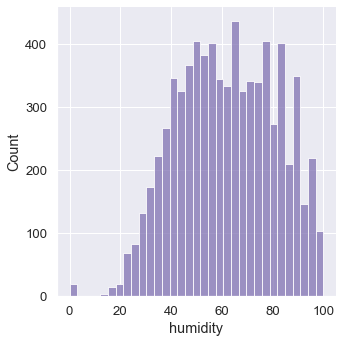

In [37]:
sns.displot(df['humidity'], kde=False, color='m')

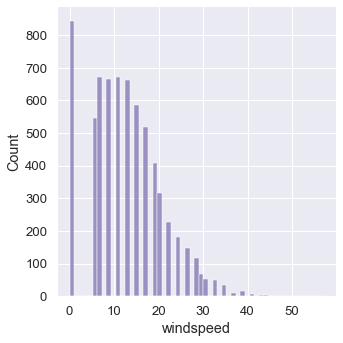

In [38]:
sns.displot(df['windspeed'], kde=False, color='m')

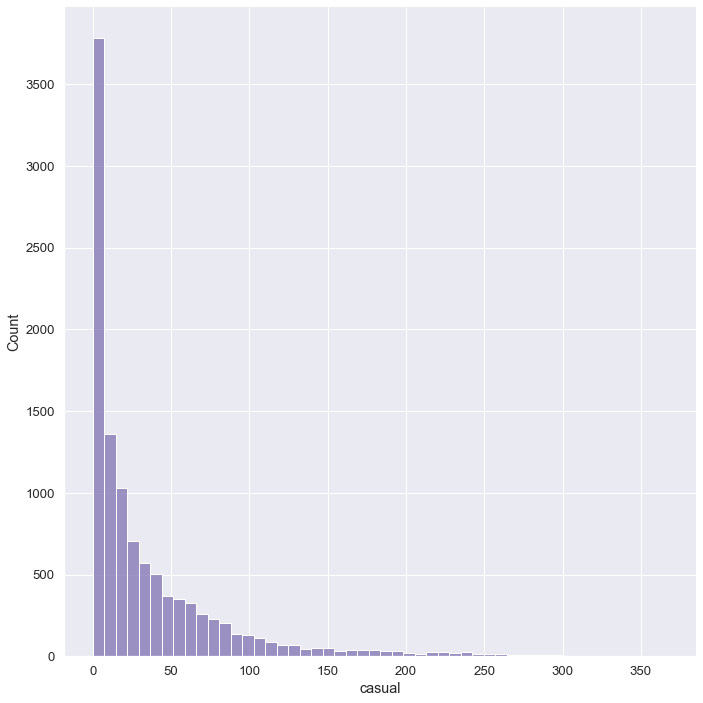

In [39]:
sns.displot(df['casual'], kde=False, color='m', height=10, bins=50)

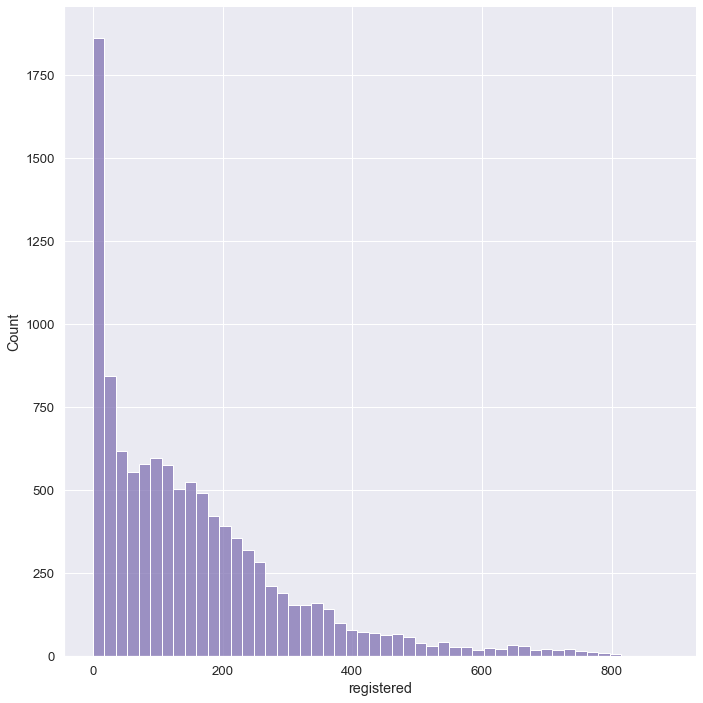

In [40]:
sns.displot(df['registered'], kde=False, color='m', height=10, bins=50)

In [41]:
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

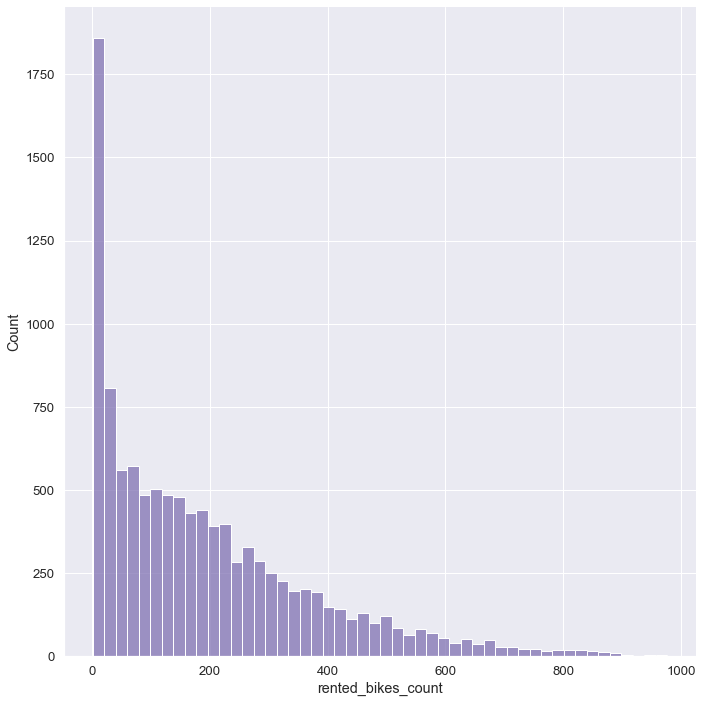

In [42]:
sns.displot(df['rented_bikes_count'], kde=False, color='m', height=10, bins=50)

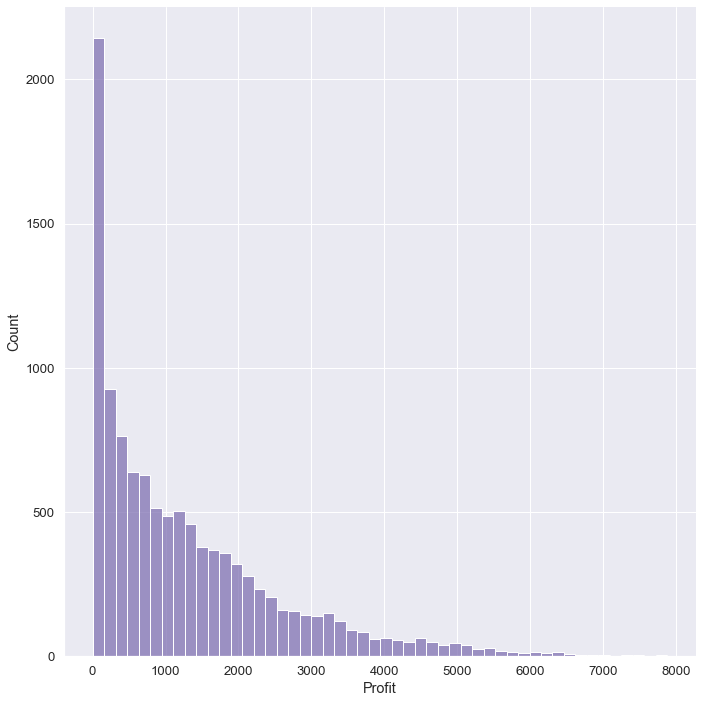

In [43]:
sns.displot(df['Profit'], kde=False, color='m', height=10, bins=50)

**Numerical Features - Bivariate**

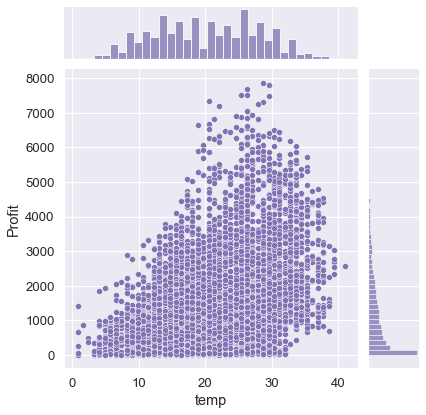

In [44]:
sns.jointplot(x='temp', y='Profit', data=df, color='m')

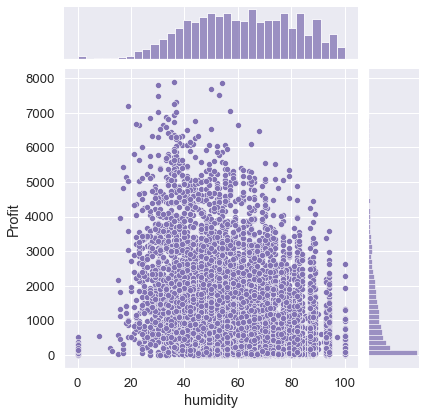

In [45]:
sns.jointplot(x='humidity', y='Profit', data=df, color='m')

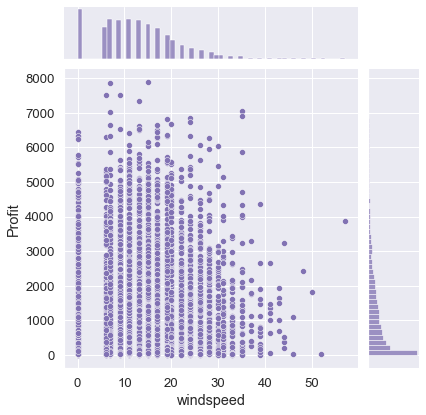

In [46]:
sns.jointplot(x='windspeed', y='Profit', data=df, color='m')

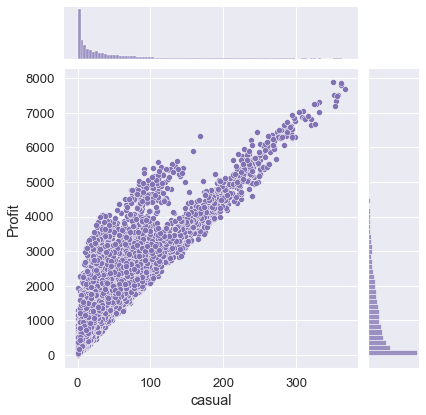

In [47]:
sns.jointplot(x='casual', y='Profit', data=df, color='m')

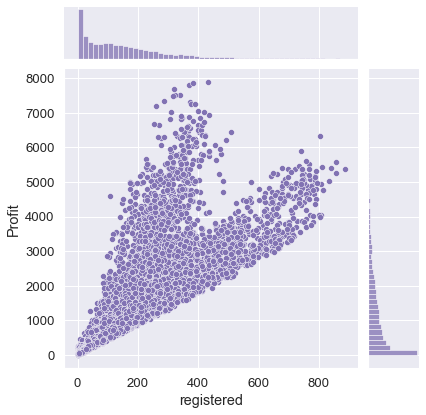

In [48]:
sns.jointplot(x='registered', y='Profit', data=df, color='m')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month_name          10886 non-null  object    

**Categorical Features**
- season              
- holiday             
- workingday          
- weather             
- year                
- month_name            
- day_of_week         
- hour                
- is_rush_hour        
- is_school_day               

**Categorical Features - Univariate**

<AxesSubplot:xlabel='season', ylabel='count'>

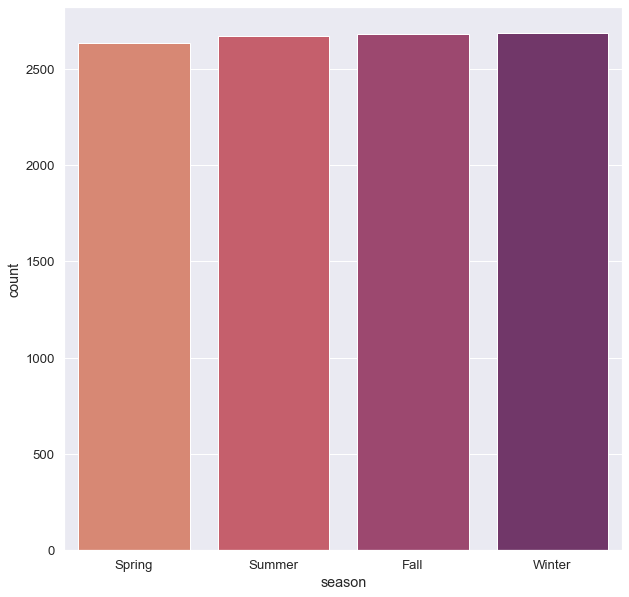

In [50]:
sns.countplot(x='season', data=df, palette='flare')

<AxesSubplot:xlabel='holiday', ylabel='count'>

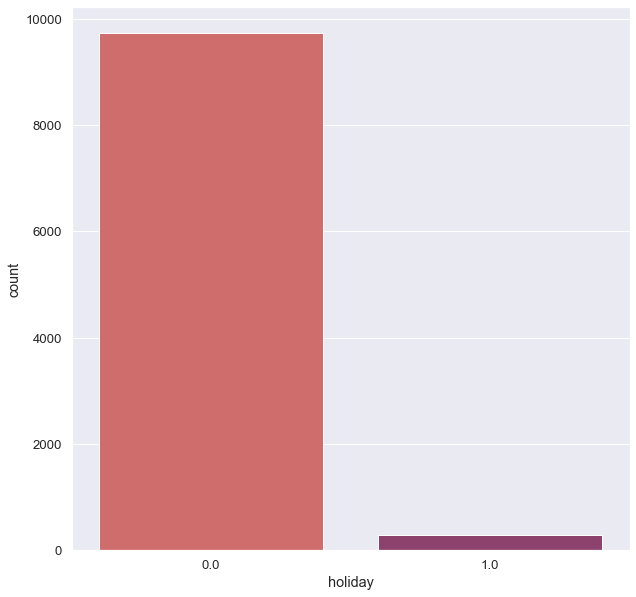

In [51]:
sns.countplot(x='holiday', data=df, palette='flare')

<AxesSubplot:xlabel='workingday', ylabel='count'>

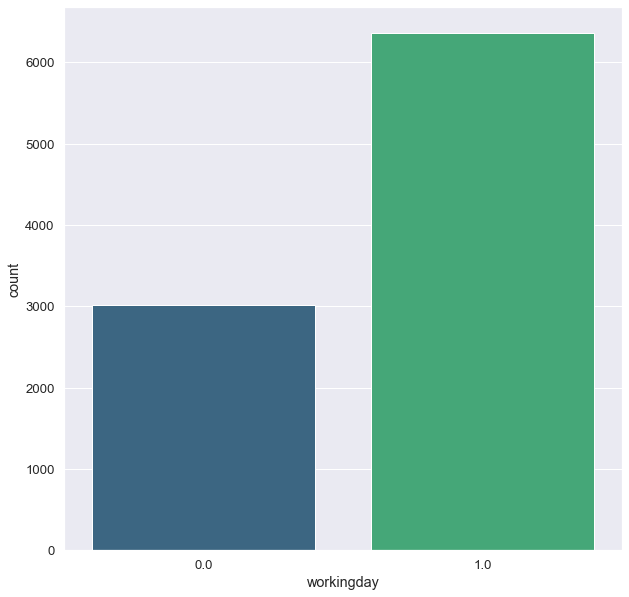

In [52]:
sns.countplot(x='workingday', data=df, palette='viridis')

<AxesSubplot:xlabel='weather', ylabel='count'>

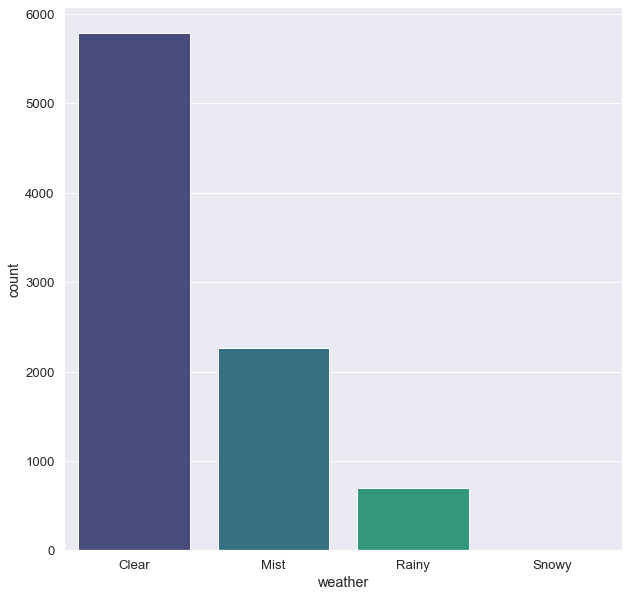

In [53]:
sns.countplot(x='weather', data=df, palette='viridis')

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

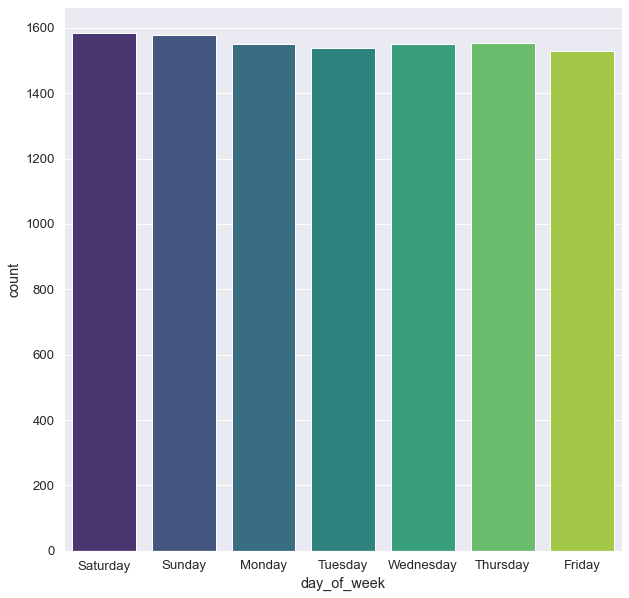

In [54]:
sns.countplot(x='day_of_week', data=df, palette='viridis')

<AxesSubplot:xlabel='hour', ylabel='count'>

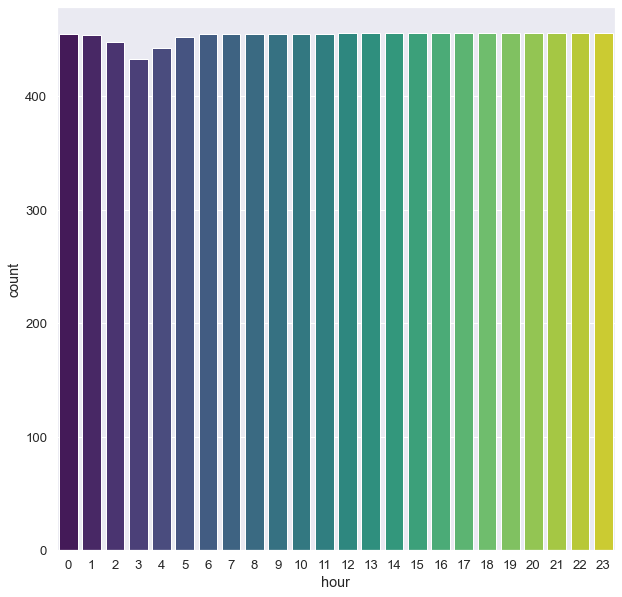

In [55]:
sns.countplot(x='hour', data=df, palette='viridis')

<AxesSubplot:xlabel='is_rush_hour', ylabel='count'>

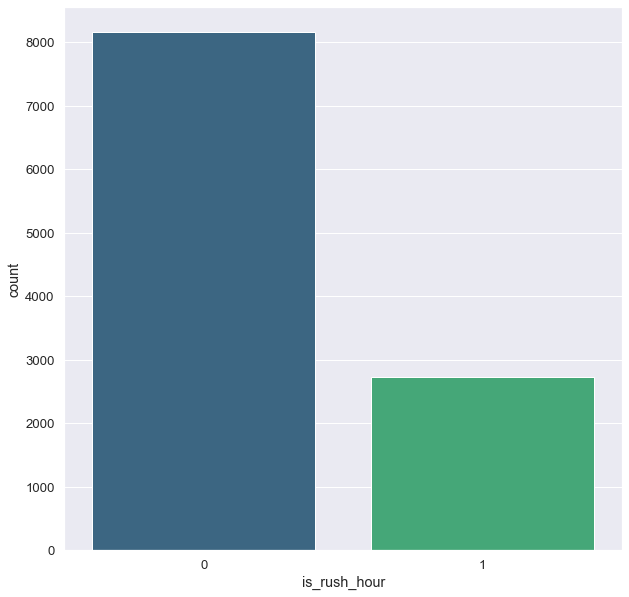

In [56]:
sns.countplot(x='is_rush_hour', data=df, palette='viridis')

<AxesSubplot:xlabel='is_rush_hour', ylabel='count'>

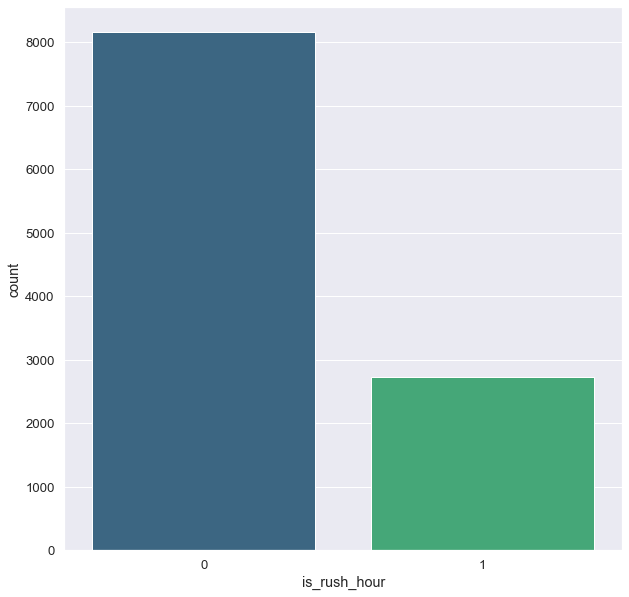

In [57]:
sns.countplot(x='is_rush_hour', data=df, palette='viridis')

<AxesSubplot:xlabel='is_school_day', ylabel='count'>

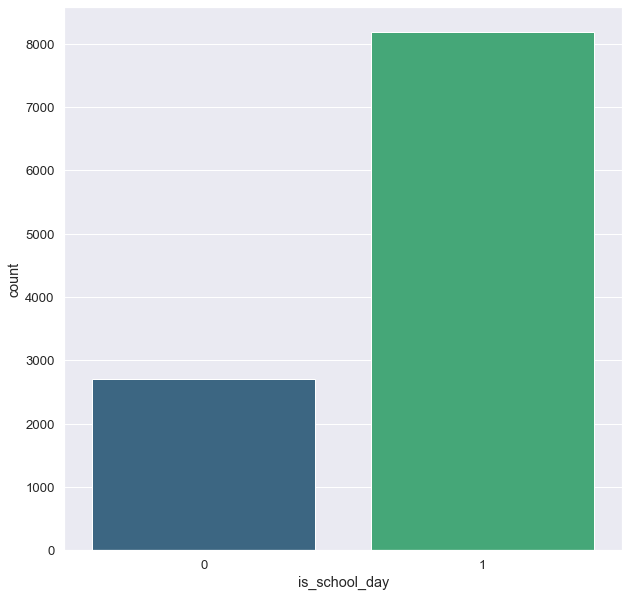

In [58]:
sns.countplot(x='is_school_day', data=df, palette='viridis')

**Categorical Features - Bivariate**

<AxesSubplot:xlabel='season', ylabel='Profit'>

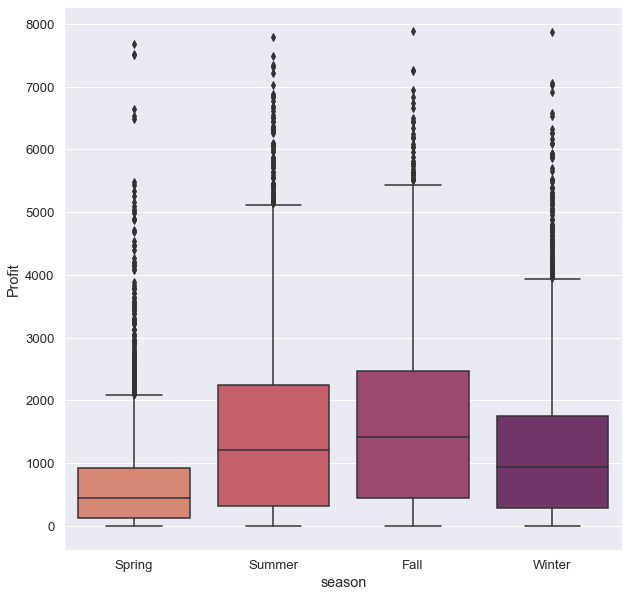

In [59]:
sns.boxplot(x='season', y='Profit', data=df, palette='flare')

<AxesSubplot:xlabel='holiday', ylabel='Profit'>

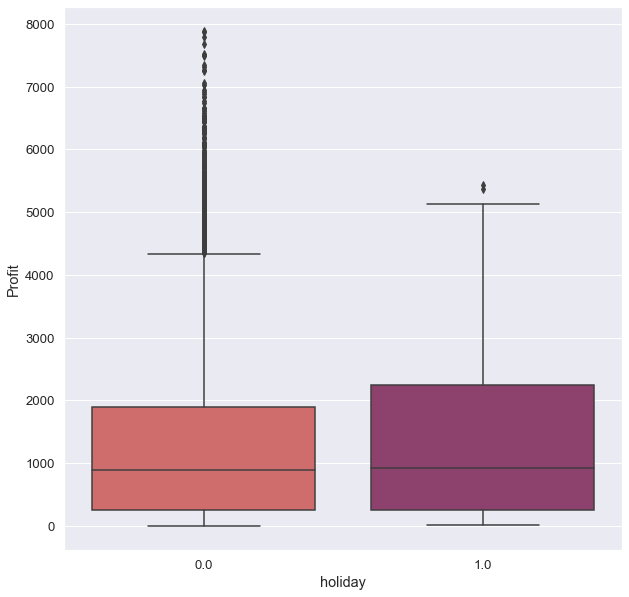

In [60]:
sns.boxplot(x='holiday', y='Profit', data=df, palette='flare')

<AxesSubplot:xlabel='workingday', ylabel='Profit'>

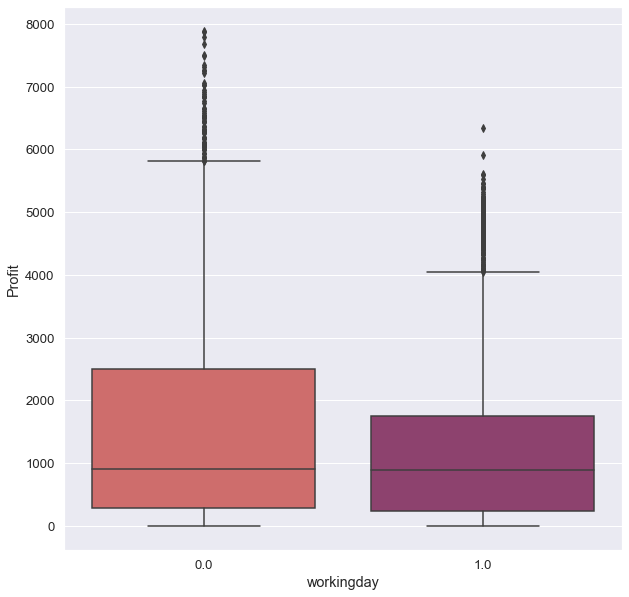

In [61]:
sns.boxplot(x='workingday', y='Profit', data=df, palette='flare')

<AxesSubplot:xlabel='weather', ylabel='Profit'>

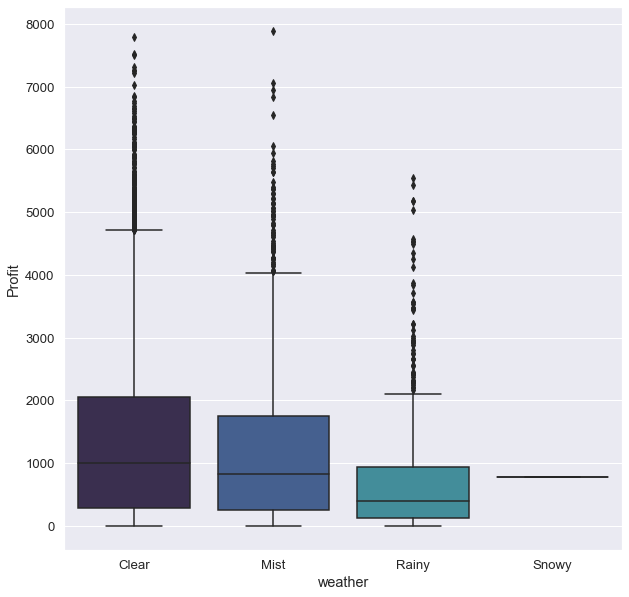

In [62]:
sns.boxplot(x='weather', y='Profit', data=df, palette='mako')

<AxesSubplot:xlabel='Profit', ylabel='day_of_week'>

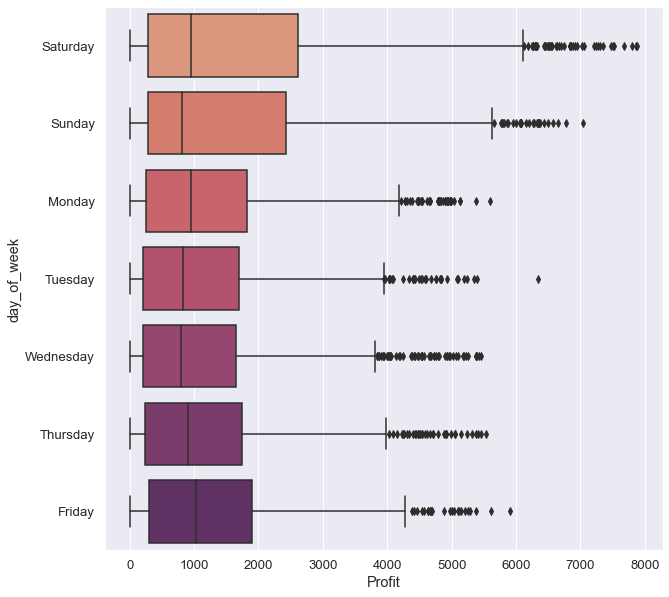

In [63]:
sns.boxplot(y='day_of_week', x='Profit', data=df, palette='flare')

<AxesSubplot:xlabel='Profit', ylabel='day_of_week'>

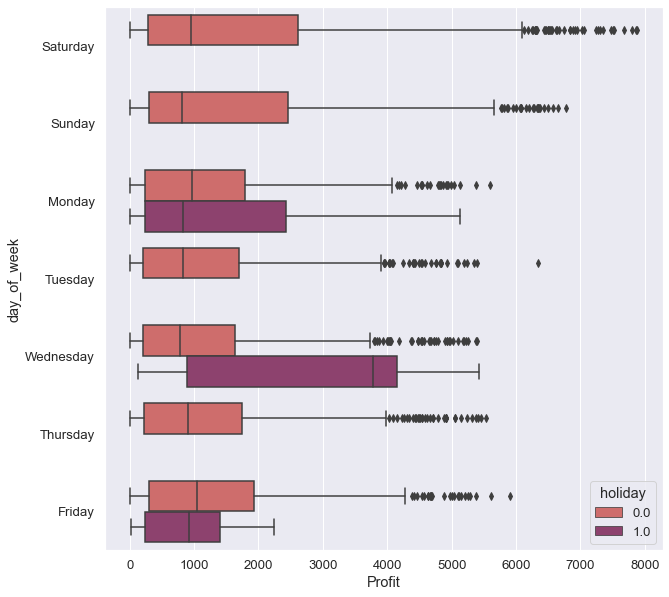

In [64]:
sns.boxplot(y='day_of_week', x='Profit', data=df, palette='flare', hue='holiday')

<AxesSubplot:xlabel='hour', ylabel='Profit'>

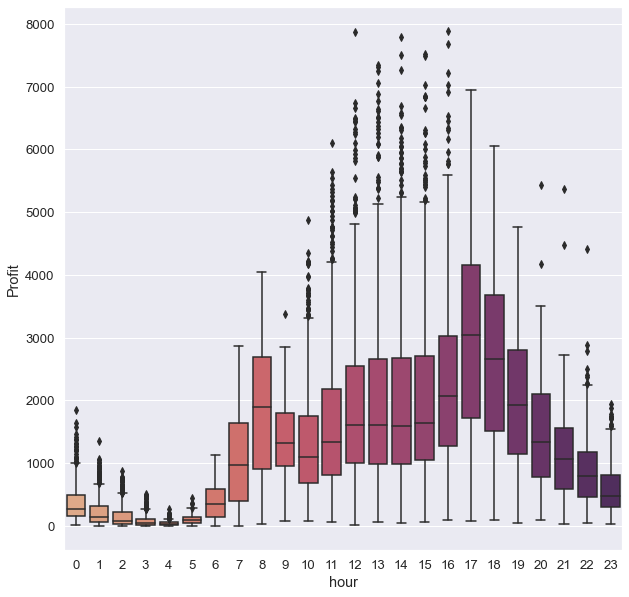

In [65]:
sns.boxplot(x='hour', y='Profit', data=df, palette='flare')

<AxesSubplot:xlabel='is_rush_hour', ylabel='Profit'>

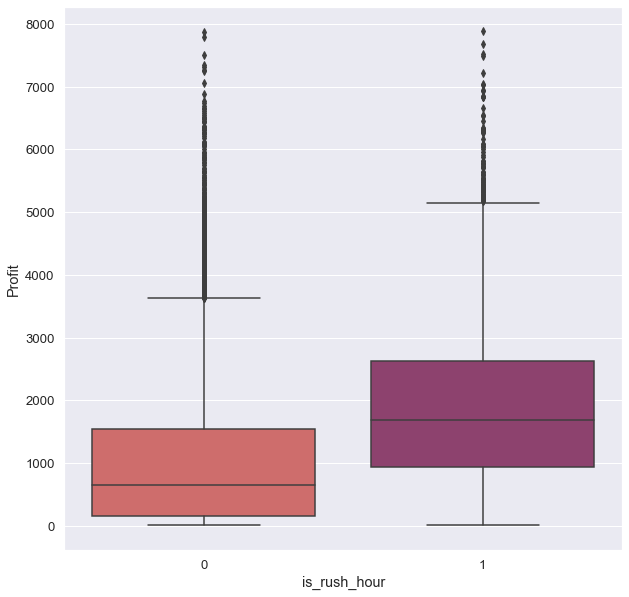

In [66]:
sns.boxplot(x='is_rush_hour', y='Profit', data=df, palette='flare')

<AxesSubplot:xlabel='is_school_day', ylabel='Profit'>

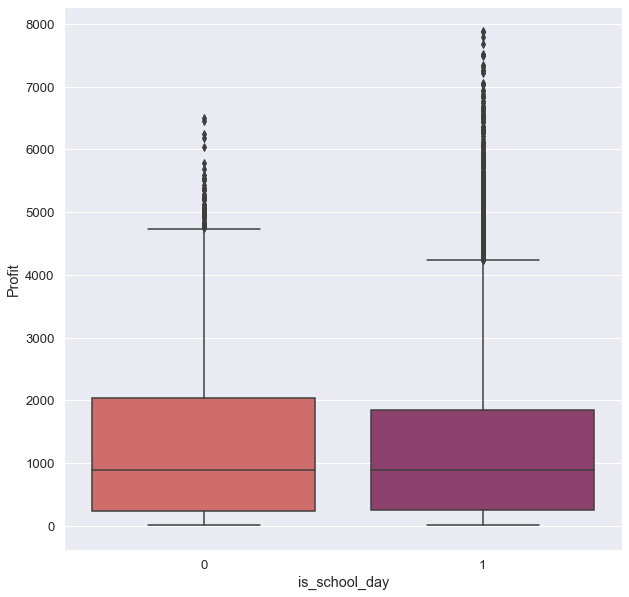

In [67]:
sns.boxplot(x='is_school_day', y='Profit', data=df, palette='flare')

**Matrix Plot**

In [68]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour,is_school_day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,107.328767,2011,January,1,Saturday,0,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,275.028767,2011,January,1,Saturday,1,0,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,201.928767,2011,January,1,Saturday,2,0,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,94.428767,2011,January,1,Saturday,3,0,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,4.128767,2011,January,1,Saturday,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,1534.928767,2012,December,12,Wednesday,19,0,1
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20,0,1
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,773.828767,2012,December,12,Wednesday,21,0,1
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,709.328767,2012,December,12,Wednesday,22,0,1


In [69]:
new_df = pd.pivot_table(data=df, values='Profit', columns='day_of_week', index='month_name')
new_df

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month_name,,,,,,,
April,1154.450434,1347.061161,1564.097100,1901.682934,1298.500434,1145.928073,1017.447255
August,1620.510712,1476.018767,2177.205434,1696.931267,1571.299600,1531.130434,1557.712795
December,939.056267,946.694739,1147.241962,884.553767,913.542934,1018.283767,872.943767
February,720.246498,575.349820,663.462100,565.585910,561.281584,537.583852,589.928063
January,562.122384,391.098271,583.123767,507.168627,565.983389,471.271287,422.948767
July,1685.607934,1704.002378,2129.260434,1874.837795,1607.132934,1472.459323,1682.382934
June,1575.002378,1474.728767,2399.467656,2142.542656,1422.161267,1441.439600,1451.257934
March,819.221021,968.421987,1401.718350,1258.993724,873.243556,759.302717,865.646414
May,1654.002934,1172.976267,2287.966267,1791.423767,1477.266962,1251.994739,1189.405850


<AxesSubplot:xlabel='day_of_week', ylabel='month_name'>

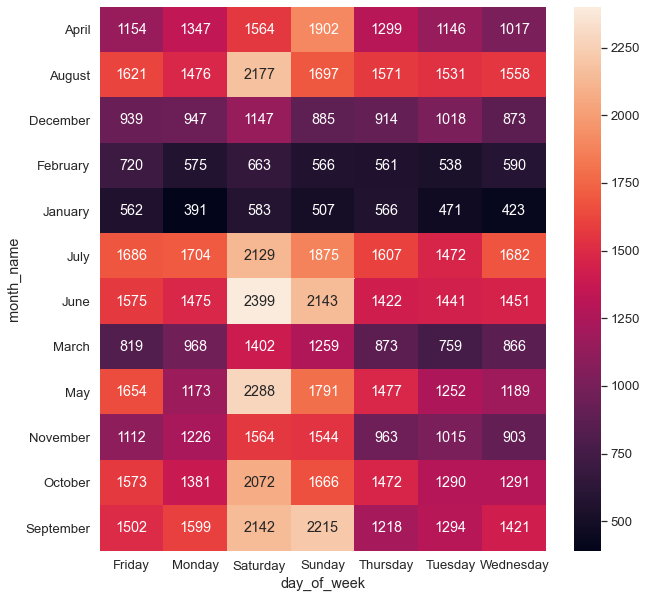

In [70]:
sns.heatmap(new_df, annot=True, fmt='.0f')

<AxesSubplot:>

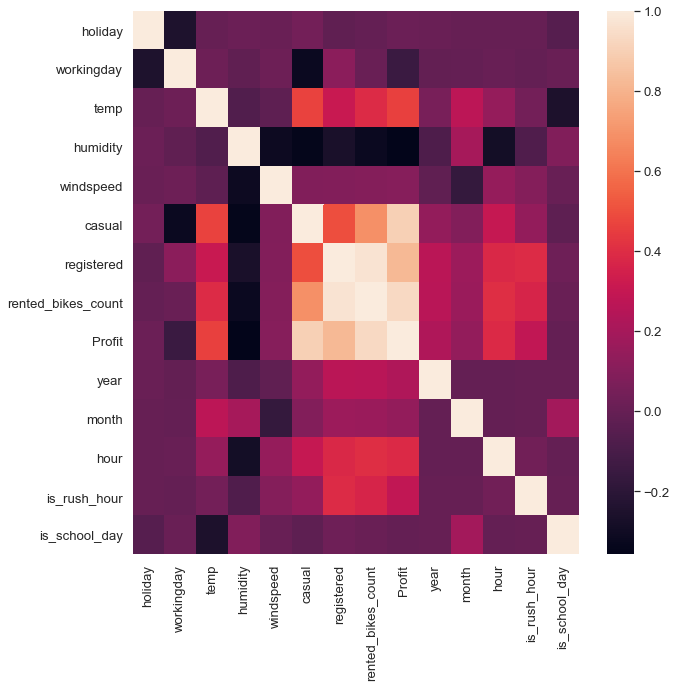

In [71]:
sns.heatmap(df.corr())

## Data preprocessing

- Data Cleaning or Cleansing
- Work with Missing data
- Work with Categorical data
- Split data to Train and Test Sets
- Feature Scaling

#### Data Cleaning or Cleansing

Numercial features cleaning
- Change numeric columns to numeric use to_numeric
- Use describe to make sure values is true

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month_name          10886 non-null  object    

In [73]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'Profit', 'year', 'month_name', 'month', 'day_of_week', 'hour',
       'is_rush_hour', 'is_school_day'],
      dtype='object')

In [74]:
for col in ['temp','humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count', 'Profit']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month_name          10886 non-null  object    

In [76]:
df.describe()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,Profit,year,month,hour,is_rush_hour,is_school_day
count,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,1288.280751,2011.501929,6.521495,11.541613,0.251056,0.751240
std,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,1309.683400,0.500019,3.444373,6.915838,0.433641,0.432314
min,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,4.128767,2011.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,253.528767,2011.000000,4.000000,6.000000,0.000000,1.000000
50%,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,889.928767,2012.000000,7.000000,12.000000,0.000000,1.000000
75%,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1891.828767,2012.000000,10.000000,18.000000,1.000000,1.000000
max,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,7881.728767,2012.000000,12.000000,23.000000,1.000000,1.000000


Categorical features cleaning
- Use unique to check the categorical feature values

In [77]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'Profit', 'year', 'month_name', 'month', 'day_of_week', 'hour',
       'is_rush_hour', 'is_school_day'],
      dtype='object')

In [78]:
for col in ['season', 'holiday', 'workingday', 'weather','year', 'month_name', 'day_of_week', 'hour', 'is_rush_hour','is_school_day']:
    print(f'------ {col} ------')
    print(df[col].unique())
    print('=============================')

------ season ------
['Spring' nan 'Summer' 'Fall' 'Winter']
------ holiday ------
[ 0. nan  1.]
------ workingday ------
[ 0. nan  1.]
------ weather ------
['Clear' nan 'Mist' 'Rainy' 'Snowy']
------ year ------
[2011 2012]
------ month_name ------
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
------ day_of_week ------
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
------ hour ------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
------ is_rush_hour ------
[0 1]
------ is_school_day ------
[0 1]


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  Profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month_name          10886 non-null  object    

In [80]:
# Work with Missing data
df.isna().sum()

datetime                 0
season                 214
holiday                856
workingday            1498
weather               2140
temp                  2782
humidity              3424
windspeed             4066
casual                   0
registered               0
rented_bikes_count       0
Profit                   0
year                     0
month_name               0
month                    0
day_of_week              0
hour                     0
is_rush_hour             0
is_school_day            0
dtype: int64

In [81]:
df.drop('windspeed', axis = 1, inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour,is_school_day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16,107.328767,2011,January,1,Saturday,0,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,8,32,40,275.028767,2011,January,1,Saturday,1,0,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,5,27,32,201.928767,2011,January,1,Saturday,2,0,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13,94.428767,2011,January,1,Saturday,3,0,0
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,0,1,1,4.128767,2011,January,1,Saturday,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336,1534.928767,2012,December,12,Wednesday,19,0,1
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20,0,1
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,4,164,168,773.828767,2012,December,12,Wednesday,21,0,1
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,12,117,129,709.328767,2012,December,12,Wednesday,22,0,1


In [82]:
df.dropna(subset=['season'], inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour,is_school_day
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,3,13,16,107.328767,2011,January,1,Saturday,0,0,0
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,8,32,40,275.028767,2011,January,1,Saturday,1,0,0
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,5,27,32,201.928767,2011,January,1,Saturday,2,0,0
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,3,10,13,94.428767,2011,January,1,Saturday,3,0,0
6,2011-01-01 06:00:00,Spring,0.0,0.0,Clear,NaN,NaN,2,0,2,34.228767,2011,January,1,Saturday,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,2012-12-19 18:00:00,Winter,0.0,1.0,NaN,15.58,NaN,23,546,569,2743.228767,2012,December,12,Wednesday,18,0,1
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,7,329,336,1534.928767,2012,December,12,Wednesday,19,0,1
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,10,231,241,1165.128767,2012,December,12,Wednesday,20,0,1
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,12,117,129,709.328767,2012,December,12,Wednesday,22,0,1


In [83]:
df.isna().sum()

datetime                 0
season                   0
holiday                834
workingday            1474
weather               2093
temp                  2732
humidity              3367
casual                   0
registered               0
rented_bikes_count       0
Profit                   0
year                     0
month_name               0
month                    0
day_of_week              0
hour                     0
is_rush_hour             0
is_school_day            0
dtype: int64

In [84]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

for col in ['holiday', 'workingday', 'temp', 'humidity']:
    df[col] = imputer.fit_transform(df[[col]])

In [85]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df['weather'] = imputer.fit_transform(df[['weather']])

In [86]:
df.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
humidity              0
casual                0
registered            0
rented_bikes_count    0
Profit                0
year                  0
month_name            0
month                 0
day_of_week           0
hour                  0
is_rush_hour          0
is_school_day         0
dtype: int64

In [87]:
# Work with Categorical data
df

,datetime,season,holiday,workingday,weather,temp,humidity,casual,registered,rented_bikes_count,Profit,year,month_name,month,day_of_week,hour,is_rush_hour,is_school_day
0,2011-01-01 00:00:00,Spring,0.000000,0.0,Clear,9.840000,81.000000,3,13,16,107.328767,2011,January,1,Saturday,0,0,0
1,2011-01-01 01:00:00,Spring,0.000000,0.0,Clear,9.020000,80.000000,8,32,40,275.028767,2011,January,1,Saturday,1,0,0
2,2011-01-01 02:00:00,Spring,0.000000,0.0,Clear,9.020000,61.849829,5,27,32,201.928767,2011,January,1,Saturday,2,0,0
3,2011-01-01 03:00:00,Spring,0.000000,0.0,Clear,9.840000,75.000000,3,10,13,94.428767,2011,January,1,Saturday,3,0,0
6,2011-01-01 06:00:00,Spring,0.000000,0.0,Clear,20.299854,61.849829,2,0,2,34.228767,2011,January,1,Saturday,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,2012-12-19 18:00:00,Winter,0.000000,1.0,Clear,15.580000,61.849829,23,546,569,2743.228767,2012,December,12,Wednesday,18,0,1
10881,2012-12-19 19:00:00,Winter,0.000000,1.0,Clear,15.580000,50.000000,7,329,336,1534.928767,2012,December,12,Wednesday,19,0,1
10882,2012-12-19 20:00:00,Winter,0.000000,1.0,Clear,14.760000,61.849829,10,231,241,1165.128767,2012,December,12,Wednesday,20,0,1
10884,2012-12-19 22:00:00,Winter,0.028868,1.0,Clear,13.940000,61.849829,12,117,129,709.328767,2012,December,12,Wednesday,22,0,1


In [88]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'casual', 'registered', 'rented_bikes_count', 'Profit',
       'year', 'month_name', 'month', 'day_of_week', 'hour', 'is_rush_hour',
       'is_school_day'],
      dtype='object')

In [89]:
df = df[['season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'rented_bikes_count', 'Profit', 'month', 'day_of_week', 'hour']]
df

,season,holiday,workingday,weather,temp,humidity,rented_bikes_count,Profit,month,day_of_week,hour
0,Spring,0.000000,0.0,Clear,9.840000,81.000000,16,107.328767,1,Saturday,0
1,Spring,0.000000,0.0,Clear,9.020000,80.000000,40,275.028767,1,Saturday,1
2,Spring,0.000000,0.0,Clear,9.020000,61.849829,32,201.928767,1,Saturday,2
3,Spring,0.000000,0.0,Clear,9.840000,75.000000,13,94.428767,1,Saturday,3
6,Spring,0.000000,0.0,Clear,20.299854,61.849829,2,34.228767,1,Saturday,6
...,...,...,...,...,...,...,...,...,...,...,...
10880,Winter,0.000000,1.0,Clear,15.580000,61.849829,569,2743.228767,12,Wednesday,18
10881,Winter,0.000000,1.0,Clear,15.580000,50.000000,336,1534.928767,12,Wednesday,19
10882,Winter,0.000000,1.0,Clear,14.760000,61.849829,241,1165.128767,12,Wednesday,20
10884,Winter,0.028868,1.0,Clear,13.940000,61.849829,129,709.328767,12,Wednesday,22


In [90]:
df = pd.get_dummies(df, columns=['season', 'weather', 'day_of_week'], drop_first=True)
df

,holiday,workingday,temp,humidity,rented_bikes_count,Profit,month,hour,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0.000000,0.0,9.840000,81.000000,16,107.328767,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0.000000,0.0,9.020000,80.000000,40,275.028767,1,1,1,0,0,0,0,0,0,1,0,0,0,0
2,0.000000,0.0,9.020000,61.849829,32,201.928767,1,2,1,0,0,0,0,0,0,1,0,0,0,0
3,0.000000,0.0,9.840000,75.000000,13,94.428767,1,3,1,0,0,0,0,0,0,1,0,0,0,0
6,0.000000,0.0,20.299854,61.849829,2,34.228767,1,6,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,0.000000,1.0,15.580000,61.849829,569,2743.228767,12,18,0,0,1,0,0,0,0,0,0,0,0,1
10881,0.000000,1.0,15.580000,50.000000,336,1534.928767,12,19,0,0,1,0,0,0,0,0,0,0,0,1
10882,0.000000,1.0,14.760000,61.849829,241,1165.128767,12,20,0,0,1,0,0,0,0,0,0,0,0,1
10884,0.028868,1.0,13.940000,61.849829,129,709.328767,12,22,0,0,1,0,0,0,0,0,0,0,0,1


In [91]:
# Split data to Train and Test Sets
x = df.drop('Profit', axis=1)
y = df['Profit']

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [94]:
df.describe()

,holiday,workingday,temp,humidity,rented_bikes_count,Profit,month,hour,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000,10672.000000
mean,0.028868,0.678082,20.299854,61.849829,191.292541,1286.110992,6.527549,11.523801,0.246814,0.250187,0.251874,0.207927,0.063906,0.000094,0.142804,0.145802,0.145146,0.142241,0.140742,0.142616
std,0.160767,0.433768,6.742300,15.939712,181.138368,1309.566790,3.448238,6.916520,0.431178,0.433141,0.434110,0.405844,0.244596,0.009680,0.349889,0.352924,0.352265,0.349314,0.347772,0.349697
min,0.000000,0.000000,0.820000,0.000000,1.000000,4.128767,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.400000,54.000000,42.000000,249.228767,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.299854,61.849829,144.000000,885.628767,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,24.600000,70.000000,283.000000,1888.603767,10.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,41.000000,100.000000,977.000000,7881.728767,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [96]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Maachine Learning

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [98]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [99]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: LR
Training Score: 0.9138584714885898
Test Score: 0.9093867128494578
RMSE: 407.8546174414492
-----------------------------------------------------------
Using model: KNNR
Training Score: 0.951548867453792
Test Score: 0.9249467143403153
RMSE: 371.1883143488403
-----------------------------------------------------------
Using model: SVR
Training Score: 0.16407560480110517
Test Score: 0.14035970053571623
RMSE: 1256.2261341915892
-----------------------------------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9694820973552472
RMSE: 236.6937456344853
-----------------------------------------------------------
Using model: RF
Training Score: 0.9972912626310212
Test Score: 0.9836535341587993
RMSE: 173.22931033071941
-----------------------------------------------------------
Using model: XGBR
Training Score: 0.9966743370407537
Test Score: 0.9859239557272113
RMSE: 160.74954516708675
-----------------------------------------------------------


In [100]:
model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
y_pred = model.predict(x_test)
y_pred

array([1093.8063 , 4573.5273 ,  407.5061 , ..., 1649.5153 ,  367.95755,
       1351.6844 ], dtype=float32)

In [102]:
y_test

4549     1139.328767
9074     4940.528767
9260      442.728767
9240     2618.528767
1414     1853.128767
            ...     
2612     1732.728767
5378        4.128767
6772     1586.528767
5207      369.628767
10786    1160.828767
Name: Profit, Length: 2135, dtype: float64

### Testing on real data and deployment

In [103]:
import joblib

In [104]:
joblib.dump(model, 'model.h5')

['model.h5']

In [105]:
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [106]:
x.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'rented_bikes_count',
       'month', 'hour', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_Mist', 'weather_Rainy', 'weather_Snowy', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [107]:
test_data = [1, 0, 24, 60, 126, 5, 8, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]

In [108]:
test_data = scaler.transform([test_data])

In [109]:
model.predict(test_data)

array([759.18176], dtype=float32)